In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [2]:
data = pd.read_csv('./data_sunpower_SPWR.csv')
data['date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('date', inplace=True)
data.drop('Date', axis=1, inplace=True)

In [3]:
data

,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
date,,,,,
2011-01-03,3,0.000000,0.253000,0.385867,13.0600
2011-01-04,15,0.000000,0.119733,0.209133,13.6300
2011-01-05,3,0.000000,0.000000,0.000000,13.8600
2011-01-06,18,0.000000,0.093778,0.157900,13.6275
2011-01-07,5,0.022000,0.250600,0.369080,13.4400
...,...,...,...,...,...
2021-03-26,52,0.022558,0.140096,0.201854,32.8700
2021-03-29,36,0.029778,0.113750,0.229036,29.2400
2021-03-30,78,0.014551,0.169077,0.327376,31.5200


# Import Data Normalized

In [4]:
data_normalized =  pd.read_csv('./data_sunpower_SPWR_normalized.csv')

In [5]:
data_normalized

,Date,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
0,2011-01-03,0.002328,0.000000,0.408813,0.610413,0.184912
1,2011-01-04,0.016298,0.000000,0.193472,0.442613,0.196258
2,2011-01-05,0.002328,0.000000,0.000000,0.244050,0.200836
3,2011-01-06,0.019790,0.000000,0.151532,0.393969,0.196208
4,2011-01-07,0.004657,0.090246,0.404935,0.594475,0.192476
...,...,...,...,...,...,...
2552,2021-03-26,0.059371,0.092534,0.226376,0.435701,0.579220
2553,2021-03-29,0.040745,0.122151,0.183804,0.461509,0.506967
2554,2021-03-30,0.089639,0.059691,0.273205,0.554878,0.552349
2555,2021-03-31,0.081490,0.082562,0.211245,0.471716,0.590764


# Lag Analysis

In [6]:
max_lag = 100

In [7]:
def plot_cross_correlation(series_1, series_2, max_lag):
    fig, ax1 = plt.subplots(figsize = (18,5))
    ax1.xcorr(series_1, series_2, usevlines = True, maxlags = max_lag, normed=True)
    ax1.set_ylim(0,1)
    ax1.grid(True)
    plt.show()

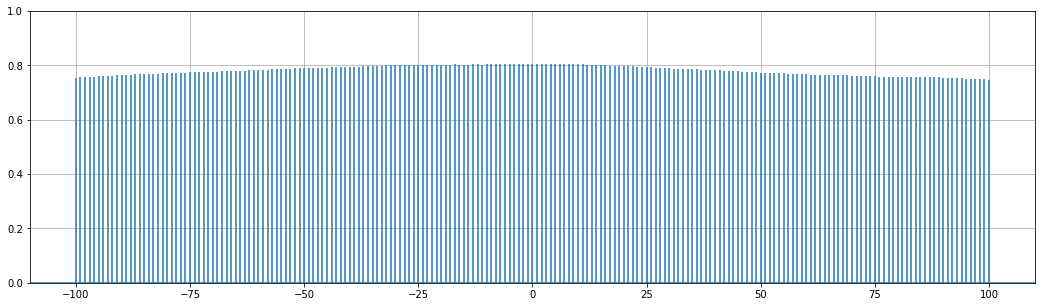

In [8]:
series_1 = data['pos_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

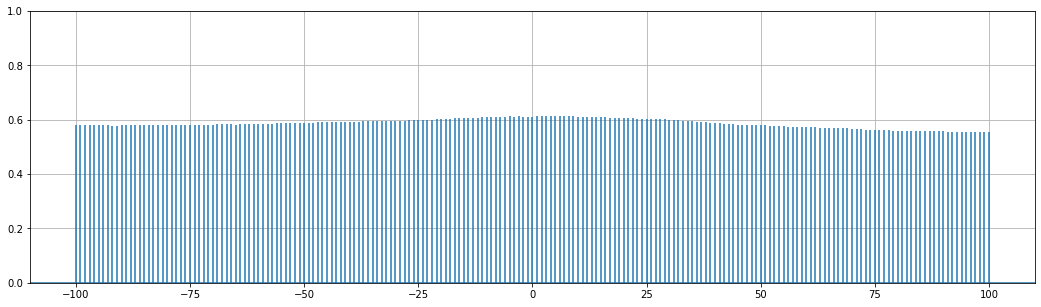

In [9]:
series_1 = data['neg_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

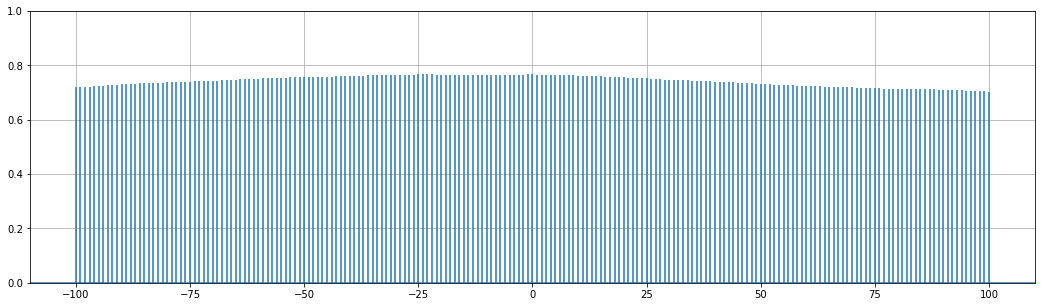

In [10]:
series_1 = data['compound_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

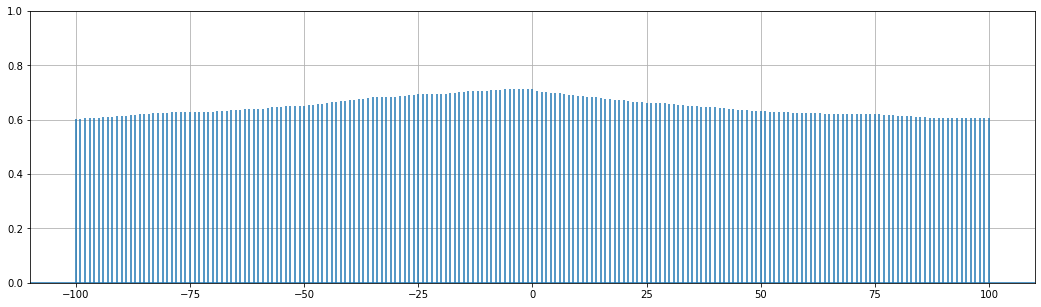

In [15]:
series_1 = data['daily_tweets'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

# Granger Causality 

In [11]:
data.columns

Index(['daily_tweets', 'neg_sentiment', 'pos_sentiment', 'compound_sentiment',
       'closing_price'],
      dtype='object')

In [12]:
input_data = np.asarray(data[['compound_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8320  , p=0.0158  , df_denom=2553, df_num=1
ssr based chi2 test:   chi2=5.8388  , p=0.0157  , df=1
likelihood ratio test: chi2=5.8322  , p=0.0157  , df=1
parameter F test:         F=5.8320  , p=0.0158  , df_denom=2553, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2472  , p=0.0053  , df_denom=2550, df_num=2
ssr based chi2 test:   chi2=10.5149 , p=0.0052  , df=2
likelihood ratio test: chi2=10.4933 , p=0.0053  , df=2
parameter F test:         F=5.2472  , p=0.0053  , df_denom=2550, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3207  , p=0.0190  , df_denom=2547, df_num=3
ssr based chi2 test:   chi2=9.9895  , p=0.0187  , df=3
likelihood ratio test: chi2=9.9700  , p=0.0188  , df=3
parameter F test:         F=3.3207  , p=0.0190  , df_denom=2547, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3153  , p=0.

{1: ({'ssr_ftest': (5.831967913211772, 0.015807368472575394, 2553.0, 1),
   'ssr_chi2test': (5.838820989490516, 0.01567632767044637, 1),
   'lrtest': (5.832162147416966, 0.01573577186557926, 1),
   'params_ftest': (5.831967913211439, 0.015807368472579145, 2553.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.247172901117143, 0.005319344233061428, 2550.0, 2),
   'ssr_chi2test': (10.514922950866117, 0.005208509881089685, 2),
   'lrtest': (10.493345417911769, 0.005265007499683594, 2),
   'params_ftest': (5.247172901117352, 0.005319344233059954, 2550.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.320697989890169, 0.01904285938335959, 2547.0, 3),
   'ssr_chi2test': (9.989473105040625, 0.018655830199968113, 3),
   'lrtest': (9.969987958433194, 0.0188229791130109, 3),
   'params_ftest': (3.320697989890084, 0.01904285938336439, 2547.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
         

In [13]:
input_data = np.asarray(data[['pos_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=26.5220 , p=0.0000  , df_denom=2553, df_num=1
ssr based chi2 test:   chi2=26.5532 , p=0.0000  , df=1
likelihood ratio test: chi2=26.4162 , p=0.0000  , df=1
parameter F test:         F=26.5220 , p=0.0000  , df_denom=2553, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.1237 , p=0.0000  , df_denom=2550, df_num=2
ssr based chi2 test:   chi2=26.2989 , p=0.0000  , df=2
likelihood ratio test: chi2=26.1645 , p=0.0000  , df=2
parameter F test:         F=13.1237 , p=0.0000  , df_denom=2550, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.0249  , p=0.0000  , df_denom=2547, df_num=3
ssr based chi2 test:   chi2=24.1409 , p=0.0000  , df=3
likelihood ratio test: chi2=24.0275 , p=0.0000  , df=3
parameter F test:         F=8.0249  , p=0.0000  , df_denom=2547, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.0794  , p=0.

{1: ({'ssr_ftest': (26.522026447983652, 2.804222927328555e-07, 2553.0, 1),
   'ssr_chi2test': (26.553192166488923, 2.563807391553636e-07, 1),
   'lrtest': (26.41621512828351, 2.7522033594105095e-07, 1),
   'params_ftest': (26.522026447983986, 2.804222927327564e-07, 2553.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (13.123738454382128, 2.1358278717500315e-06, 2550.0, 2),
   'ssr_chi2test': (26.29894254976183, 1.946512447936473e-06, 2),
   'lrtest': (26.16451502242853, 2.081841933392711e-06, 2),
   'params_ftest': (13.123738454380259, 2.135827871754383e-06, 2550.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (8.024918849461866, 2.538686629124342e-05, 2547.0, 3),
   'ssr_chi2test': (24.140921957038405, 2.3343617318651543e-05, 3),
   'lrtest': (24.027543422067538, 2.4651400830512555e-05, 3),
   'params_ftest': (8.024918849463154, 2.5386866291197784e-05, 2547.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.

In [14]:
input_data = np.asarray(data[['daily_tweets', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=73.5747 , p=0.0000  , df_denom=2553, df_num=1
ssr based chi2 test:   chi2=73.6611 , p=0.0000  , df=1
likelihood ratio test: chi2=72.6197 , p=0.0000  , df=1
parameter F test:         F=73.5747 , p=0.0000  , df_denom=2553, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=30.3210 , p=0.0000  , df_denom=2550, df_num=2
ssr based chi2 test:   chi2=60.7609 , p=0.0000  , df=2
likelihood ratio test: chi2=60.0496 , p=0.0000  , df=2
parameter F test:         F=30.3210 , p=0.0000  , df_denom=2550, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=15.4872 , p=0.0000  , df_denom=2547, df_num=3
ssr based chi2 test:   chi2=46.5893 , p=0.0000  , df=3
likelihood ratio test: chi2=46.1694 , p=0.0000  , df=3
parameter F test:         F=15.4872 , p=0.0000  , df_denom=2547, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.0616 , p=0.

{1: ({'ssr_ftest': (73.57467273762025, 1.653251661869312e-17, 2553.0, 1),
   'ssr_chi2test': (73.66112946234131, 9.274742515066965e-18, 1),
   'lrtest': (72.61967453147372, 1.5720402895311288e-17, 1),
   'params_ftest': (73.57467273761978, 1.6532516618698054e-17, 2553.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (30.320980115674864, 9.680652835244528e-14, 2550.0, 2),
   'ssr_chi2test': (60.76086603572492, 6.396546811544358e-14, 2),
   'lrtest': (60.04963789096291, 9.128234993119547e-14, 2),
   'params_ftest': (30.32098011567422, 9.680652835250065e-14, 2550.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (15.487197104572912, 5.529112515255493e-10, 2547.0, 3),
   'ssr_chi2test': (46.58928316263747, 4.2499852804041e-10, 3),
   'lrtest': (46.16944745851288, 5.219965745453216e-10, 3),
   'params_ftest': (15.487197104576168, 5.529112515228955e-10, 2547.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.,